# DSCI 503 - Homework 04
### Sean Kilfoy

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])
n = len(x)

In [3]:
mean = sum(x) / n
diff = x - mean
var = sum(diff**2) / (n - 1)

print("Sample Mean: {:.2f}".format(mean))
print("Sample Variance: {:.2f}".format(var))

Sample Mean: 16.60
Sample Variance: 25.60


In [4]:
np_mean = np.mean(x)
np_var = np.var(x, ddof=1)

print("Sample Numpy Mean: {:.2f}".format(np_mean))
print("Sample Numpy Variance: {:.2f}".format(np_var))

Sample Numpy Mean: 16.60
Sample Numpy Variance: 25.60


## Problem 2: Scoring a Regression Model

In [5]:
def find_sse(true_y, pred_y):
    return np.sum((true_y - pred_y)**2)

In [6]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)

print("Model 1 SSE: {:.2f}".format(sse_1))
print("Model 2 SSE: {:.2f}".format(sse_2))


Model 1 SSE: 22.66
Model 2 SSE: 19.90


## Problem 3: Scoring a Classification Model

In [7]:
def find_accuracy(true_y, pred_y):
    return np.mean(true_y == pred_y)

In [8]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N'])

accuracy = find_accuracy(true_diag, pred_diag)

print("Model Accuracy: {:.4f}".format(accuracy))


Model Accuracy: 0.7500


In [9]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])

accuracy = find_accuracy(true_labels, pred_labels)

print("Model Accuracy: {:.4f}".format(accuracy))

Model Accuracy: 0.8750


## Problem 4: Classification Report

In [10]:
def classification_report(true_y, pred_y):
    classes = np.unique(true_y)
    accuracy = find_accuracy(true_y, pred_y)
    pos_class = classes[1]
    neg_class = classes[0]

    
    TP = np.sum((pred_y == pos_class) & (true_y == pos_class))
    FP = np.sum((pred_y == pos_class) & (true_y == neg_class))
    TN = np.sum((pred_y == neg_class) & (true_y == neg_class))
    FN = np.sum((pred_y == neg_class) & (true_y == pos_class))
    
    positive_precision = TP / (TP + FP)
    positive_recall = TP / (TP + FN)
    negative_precision = TN / (TN + FN)
    negative_recall = TN / (TN + FP)
    
    print("{:<20}{}".format("Positive Class:", classes[1]))
    print("{:<20}{}".format("Negative Class:", classes[0]))
    print("--------------------------")
    print("{:<20}{:.4f}".format("Accuracy:", accuracy))
    print("{:<20}{:.4f}".format("Positive Precision:", positive_precision))
    print("{:<20}{:.4f}".format("Positive Recall:", positive_recall))
    print("{:<20}{:.4f}".format("Negative Precision:", negative_precision))
    print("{:<20}{:.4f}".format("Negative Recall:", negative_recall))


In [11]:
classification_report(true_diag, pred_diag)

Positive Class:     P
Negative Class:     N
--------------------------
Accuracy:           0.7500
Positive Precision: 0.5556
Positive Recall:    0.8333
Negative Precision: 0.9091
Negative Recall:    0.7143


In [12]:
classification_report(true_labels, pred_labels)

Positive Class:     dog
Negative Class:     cat
--------------------------
Accuracy:           0.8750
Positive Precision: 0.8333
Positive Recall:    0.9091
Negative Precision: 0.9167
Negative Recall:    0.8462


## Problem 5: Transformation of Random Variables

In [13]:
np.random.seed(1)
X = np.random.normal(0, 0.4, 25000)
Y = np.exp(X)

mean_X = np.mean(X)
stddev_X = np.std(X, ddof=1)
mean_Y = np.mean(Y)
stddev_Y = np.std(Y, ddof=1)

print("{:<22}{:.4f}".format("Sample Mean of X:", mean_X))
print("{:<22}{:.4f}".format("Sample Std Dev of X:", stddev_X))
print("{:<22}{:.4f}".format("Sample Mean of Y:", mean_Y))
print("{:<22}{:.4f}".format("Sample Std Dev of Y:", stddev_Y))

Sample Mean of X:     0.0025
Sample Std Dev of X:  0.4002
Sample Mean of Y:     1.0862
Sample Std Dev of Y:  0.4537


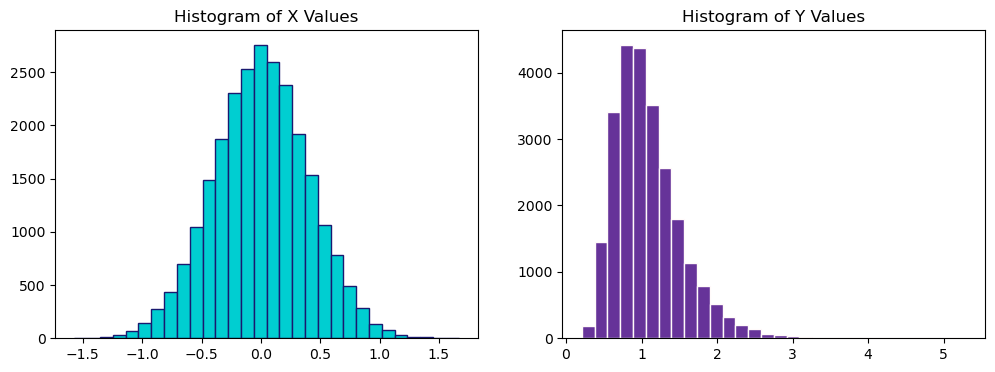

In [14]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.hist(X, bins=30, color='darkturquoise', edgecolor='midnightblue')
plt.title("Histogram of X Values")

plt.subplot(1,2,2)
plt.hist(Y, bins=30, color='rebeccapurple', edgecolor='snow')
plt.title("Histogram of Y Values")

plt.show()

In [15]:
prob_Y_lt_0_5 = np.mean(Y < 0.5)
prob_Y_lt_1 = np.mean(Y < 1)
prob_Y_lt_2 = np.mean(Y < 2)

print("Probability that Y is less than 0.5: {:.4f}".format(prob_Y_lt_0_5))
print("Probability that Y is less than 1.0: {:.4f}".format(prob_Y_lt_1))
print("Probability that Y is less than 2.0: {:.4f}".format(prob_Y_lt_2))

Probability that Y is less than 0.5: 0.0410
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574


## Problem 6: Stochastic Linear Relationships

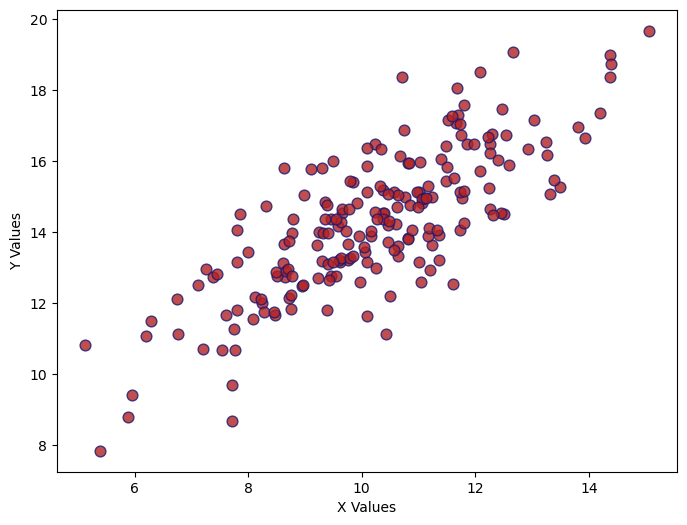

In [16]:
np.random.seed(1)
x_vals = np.random.normal(10, 2, 200)
errors = np.random.normal(0, 1.2, 200)
a = 5.1
b = 0.9
y_vals = a + b * x_vals + errors

plt.figure(figsize=[8, 6])

plt.scatter(x_vals,
            y_vals,
            s=60,
            alpha=0.8,
            edgecolors='midnightblue',
            c='firebrick')

plt.xlabel("X Values")
plt.ylabel("Y Values")

plt.show()

In [17]:
diff_x = x_vals - np.mean(x_vals)
diff_y = y_vals - np.mean(y_vals)
r_top = np.sum(diff_x * diff_y)
r_bot = np.sqrt((np.sum(diff_x ** 2)) * (np.sum(diff_y ** 2)))
r = r_top / r_bot
print("Correlation between X and Y: {:.4f}".format(r))

Correlation between X and Y: 0.7861


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

In [18]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [19]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['slateblue', 'turquoise', 'olivedrab', 'chocolate']

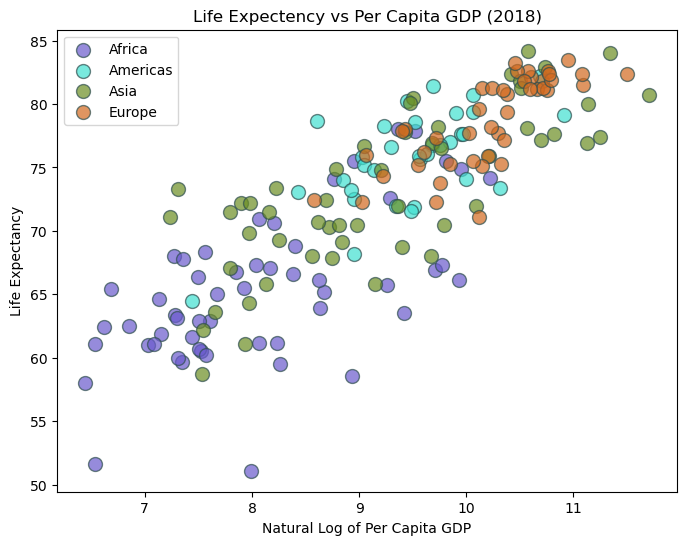

In [20]:
plt.figure(figsize=[8,6])

for i in range(len(continent_list)):
    sel = (continent == continent_list[i]) & (year == 2018)
    plt.scatter(np.log(pcgdp[sel]),
                life_exp[sel],
                s=100,
                alpha=0.7,
                edgecolor='darkslategray',
                facecolor=color_list[i],
                label=continent_list[i].title())
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectency vs Per Capita GDP (2018)')
plt.legend()
plt.show()

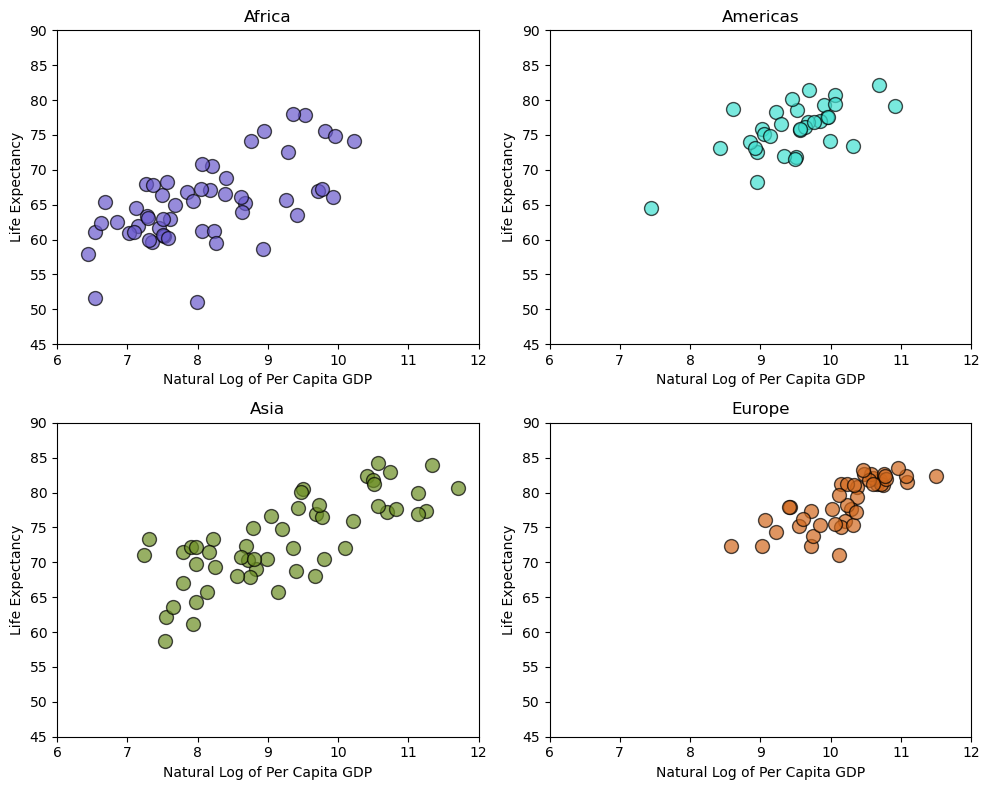

In [21]:
plt.figure(figsize=[10,8])
for i in range(len(continent_list)):
    plt.subplot(2,2,i+1)
    sel = (continent == continent_list[i]) & (year == 2018)
    plt.scatter(np.log(pcgdp[sel]), life_exp[sel], s=100, alpha=0.7, edgecolor='black', 
                facecolor=color_list[i])
    
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.xlim(6,12)
    plt.ylim(45,90)
    plt.title(continent_list[i].title())

plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

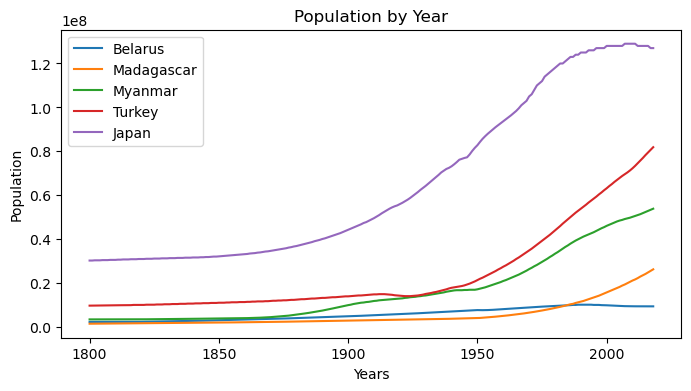

In [22]:
selected_countries = ['Belarus', 'Madagascar', 'Myanmar', 'Turkey', 'Japan']

fig, ax = plt.subplots(figsize=(8,4))
for selected_country in selected_countries:
    bmask = country == selected_country
    country_year = year[bmask]
    country_population = population[bmask]
    ax.plot(country_year, country_population, label=selected_country)

ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.set_title('Population by Year')
ax.legend()
plt.show()

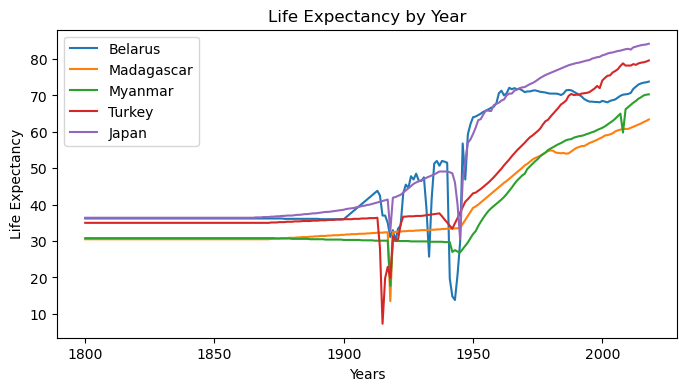

In [23]:
selected_countries = ['Belarus', 'Madagascar', 'Myanmar', 'Turkey', 'Japan']

fig, ax = plt.subplots(figsize=(8,4))
for selected_country in selected_countries:
    cmask = country == selected_country
    country_year = year[cmask]
    country_life_exp = life_exp[cmask]
    ax.plot(country_year, country_life_exp, label=selected_country)

ax.set_xlabel('Years')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy by Year')
ax.legend()
plt.show()